# Libraries

In [1]:
import pandas as pd
import warnings
import seaborn as sns
import numpy as np

warnings.filterwarnings("ignore")

# Importing Data

In [2]:
housing_df = pd.read_csv("housing_coursework_entire_dataset_23-24.csv")
housing_df.head()

,No.,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,1,-122.12,37.70,17,2488,617.0,1287,538,2.9922,179900,NEAR BAY
1,2,-122.21,38.10,36,3018,557.0,1445,556,3.8029,129900,NEAR BAY
2,3,-122.22,38.11,43,1939,353.0,968,392,3.1848,112700,NEAR BAY
3,4,-122.20,37.78,52,2300,443.0,1225,423,3.5398,158400,NEAR BAY
4,5,-122.19,37.79,50,954,217.0,546,201,2.6667,172800,NEAR BAY


# Data Preparation

In [3]:
# encoding categorical data, 'ocean_proximity'
from sklearn.preprocessing import LabelEncoder

column_name = 'ocean_proximity'
label_encoder = LabelEncoder()

# Fit and transform the categorical column
housing_df[column_name + '_encoded'] = label_encoder.fit_transform(housing_df[column_name])

housing_df.head()

,No.,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_encoded
0,1,-122.12,37.70,17,2488,617.0,1287,538,2.9922,179900,NEAR BAY,2
1,2,-122.21,38.10,36,3018,557.0,1445,556,3.8029,129900,NEAR BAY,2
2,3,-122.22,38.11,43,1939,353.0,968,392,3.1848,112700,NEAR BAY,2
3,4,-122.20,37.78,52,2300,443.0,1225,423,3.5398,158400,NEAR BAY,2
4,5,-122.19,37.79,50,954,217.0,546,201,2.6667,172800,NEAR BAY,2


In [4]:
housing_df.drop(['No.', 'ocean_proximity'], axis = 1, inplace = True)

housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_encoded
0,-122.12,37.70,17,2488,617.0,1287,538,2.9922,179900,2
1,-122.21,38.10,36,3018,557.0,1445,556,3.8029,129900,2
2,-122.22,38.11,43,1939,353.0,968,392,3.1848,112700,2
3,-122.20,37.78,52,2300,443.0,1225,423,3.5398,158400,2
4,-122.19,37.79,50,954,217.0,546,201,2.6667,172800,2


In [5]:
housing_df.isna().sum()

longitude                  0
latitude                   0
housing_median_age         0
total_rooms                0
total_bedrooms             9
population                 0
households                 0
median_income              0
median_house_value         0
ocean_proximity_encoded    0
dtype: int64

In [6]:
housing_df['median_house_value'].describe()

count      1000.000000
mean     207767.443000
std      113675.832278
min       14999.000000
25%      119900.000000
50%      184350.000000
75%      261950.000000
max      500001.000000
Name: median_house_value, dtype: float64

# Data Preprocessing

In [7]:
x = housing_df.drop(['median_house_value'], 1)
y = housing_df['median_house_value']

x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_encoded
0,-122.12,37.70,17,2488,617.0,1287,538,2.9922,2
1,-122.21,38.10,36,3018,557.0,1445,556,3.8029,2
2,-122.22,38.11,43,1939,353.0,968,392,3.1848,2
3,-122.20,37.78,52,2300,443.0,1225,423,3.5398,2
4,-122.19,37.79,50,954,217.0,546,201,2.6667,2


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#imputation method is used to replace the NaN values with median in this case
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Scaling the Splitted Data

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Use StandardScaler to transform the combined arrays
x_train_scaler = scaler.fit_transform(x_train_imputed)
x_test_scaler = scaler.transform(x_test_imputed)

# Fitting Gradient Boosted Trees

In [106]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

gb_reg_n = GradientBoostingRegressor()
gb_reg_n.fit(x_train_scaler, y_train)

y_pred_gb = gb_reg_n.predict(x_test_scaler)

In [108]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

mse_gb_n = np.round(mean_squared_error(y_test, y_pred_gb), 2)
rmse_gb_n = np.round(math.sqrt(mse_gb_n), 2)
mae_gb_n = np.round(mean_absolute_error(y_test, y_pred_gb), 2)
r2_gb_n = np.round(r2_score(y_test, y_pred_gb), 2)

print(mse_gb_n)
print(rmse_gb_n)
print(mae_gb_n)
print(r2_gb_n)

3374791059.16
58092.95
41842.4
0.71


In [111]:
gb_reg = GradientBoostingRegressor(n_estimators = 500, learning_rate = 0.1)
gb_reg.fit(x_train_scaler, y_train)

y_pred_gb = gb_reg.predict(x_test_scaler)

In [112]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

mse_gb = np.round(mean_squared_error(y_test, y_pred_gb), 2)
rmse_gb = np.round(math.sqrt(mse_gb), 2)
mae_gb = np.round(mean_absolute_error(y_test, y_pred_gb), 2)
r2_gb = np.round(r2_score(y_test, y_pred_gb), 2)

print(mse_gb)
print(rmse_gb)
print(mae_gb)
print(r2_gb)

3245200690.02
56966.66
40710.22
0.72


# Plotting the Result for GBT

Text(0.5, 1.0, 'Actual vs Predicted')

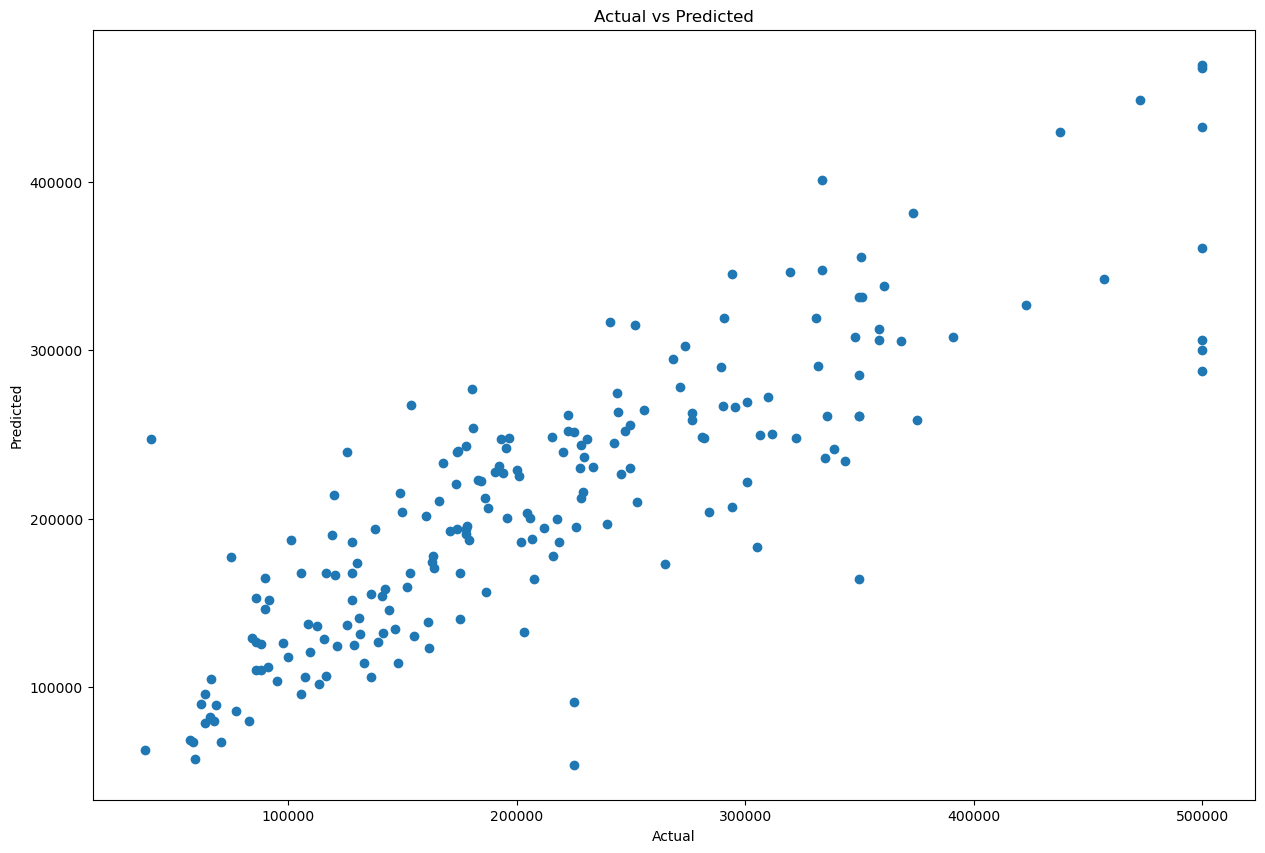

In [109]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 10))
plt.scatter(y_test, y_pred_gb)
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.title('Actual vs Predicted')

# Fitting a Random Forest

In [98]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [250, 500, 1000],
    'max_depth': [16, 18, 22],          
    'min_samples_split': [2, 5, 10],           
    'min_samples_leaf': [1, 2, 4]       
}

rf_reg = RandomForestRegressor()
rf_reg = GridSearchCV(rf_reg, parameters, n_jobs = -1)
rf_reg.fit(x_train_scaler, y_train)

y_pred_rf = rf_reg.predict(x_test_scaler)

In [100]:
mse_rf = np.round(mean_squared_error(y_test, y_pred_rf), 2)
rmse_rf = np.round(math.sqrt(mse_rf), 2)
mae_rf = np.round(mean_absolute_error(y_test, y_pred_rf), 2)
r2_rf = np.round(r2_score(y_test, y_pred_rf), 2)

print(mse_rf)
print(rmse_rf)
print(mae_rf)
print(r2_rf)

3572203856.28
59767.92
44134.88
0.69


# Fitting a Polynomial Linear Regression

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

polynomial = PolynomialFeatures(degree = 2)
x_polynomial_train = polynomial.fit_transform(x_train_scaler)
x_polynomial_test = polynomial.transform(x_test_scaler)
polynomial.fit(x_polynomial_train, y_train)
dt_plr = LinearRegression()
dt_plr.fit(x_polynomial_train, y_train)

y_pred_plr = dt_plr.predict(x_polynomial_test)

In [75]:
mse_plr = np.round(mean_squared_error(y_test, y_pred_plr), 2)
rmse_plr = np.round(math.sqrt(mse_plr), 2)
mae_plr = np.round(mean_absolute_error(y_test, y_pred_plr), 2)
r2_plr = np.round(r2_score(y_test, y_pred_plr), 2)

print(mse_plr)
print(rmse_plr)
print(mae_plr)
print(r2_plr)

3915674532.21
62575.35
45835.04
0.66


# Comparing Performances

In [113]:
df_performance = pd.DataFrame([[mse_gb, rmse_gb, mae_gb, r2_gb], [mse_rf, rmse_rf, mae_rf, r2_rf], [mse_plr, rmse_plr, mae_plr, r2_plr]], 
                              columns = ['MSE', 'RMSE', 'MAE', 'R2'], index = ['Gradient Boosted Trees', 'Random Forest', 'Polynomial Regression'])

df_performance

,MSE,RMSE,MAE,R2
Gradient Boosted Trees,3.245201e+09,56966.66,40710.22,0.72
Random Forest,3.572204e+09,59767.92,44134.88,0.69
Polynomial Regression,3.915675e+09,62575.35,45835.04,0.66
